'''
 * Copyright (c) 2018 Radhamadhab Dalai
 *
 * Permission is hereby granted, free of charge, to any person obtaining a copy
 * of this software and associated documentation files (the "Software"), to deal
 * in the Software without restriction, including without limitation the rights
 * to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
 * copies of the Software, and to permit persons to whom the Software is
 * furnished to do so, subject to the following conditions:
 *
 * The above copyright notice and this permission notice shall be included in
 * all copies or substantial portions of the Software.
 *
 * THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
 * IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
 * FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
 * AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
 * LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
 * OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN
 * THE SOFTWARE.
'''

# Convolutional Neural Networks (CNNs)

Convolutional Neural Networks (CNNs) have been extremely successful in image, speech, audio, and video recognition tasks due to their ability to exploit translational equivariance/invariance with respect to grid structures (in 1, 2, and 3 dimensions) [13].

## Gabor Filter Banks

Gabor filter banks are a powerful method for feature extraction. The method involves the following steps:
1. **Creating Gabor Filters**: A bank of \( N \) Gabor filters is created.
2. **Convolution**: Each filter is convolved with the input image to produce \( N \) different images.
3. **Pooling**: Pixels from each image are pooled to extract relevant information.

The process mainly consists of two steps: convolution and pooling.

## Historical Background

- **Neocognitron**: Proposed by Fukushima [32], the Neocognitron is generally seen as a model that inspired CNNs computationally.
- **LeNet**: The first convolutional neural network, LeNet, was invented by Le Cun et al. [88] for handwritten digit recognition and further popularized by LeCun et al. [89].

## Benefits of CNNs

Compared to traditional fully connected neural networks, CNNs offer the advantage of a reduced number of parameters to be learned. The typical layers in a CNN include:

1. **Input Layer**: Feeds data into the network. Inputs can be raw data (e.g., image pixels) or their transformations to highlight specific aspects of the data.

2. **Convolutional Layers**: Contain a series of filters with fixed sizes used to perform convolutions on the data to generate feature maps.

3. **Pooling Layers**: Focus on the most important patterns by reducing the dimensionality of the feature maps used by subsequent layers. Also known as downsampling layers.

4. **Rectified Linear Unit (ReLU)**: Applies a nonlinear function to the output \( x \) of the previous layer, such as \( f(x) = \max(0, x) \). ReLU layers contribute to faster convergence in training CNNs [84].

5. **Fully Connected Layers**: Used for understanding patterns generated by the previous layers. Neurons in these layers are fully connected to all activations in the previous layer and are also called inner product layers. After training, features from these layers can be used in transfer learning to train another classifier.

6. **Loss Layers**: Specify how the network training penalizes the deviation between the predicted and true labels. Various loss functions can be used, including Softmax, Sigmoid, Cross-entropy, and Euclidean loss.

## Key Component: Convolutional Layers

Convolutional layers are the most essential components of CNNs and are discussed first.


In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, ReLU
from tensorflow.keras.models import Sequential

# Create a simple CNN model
model = Sequential([
    # Input layer (you can specify input shape for the first layer)
    Conv2D(filters=32, kernel_size=(3, 3), input_shape=(64, 64, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    
    Conv2D(filters=128, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')  # Assume 10 classes for classification
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Print model summary
model.summary()

# Dummy data for demonstration
import numpy as np
X_train = np.random.rand(100, 64, 64, 3)  # 100 samples of 64x64 RGB images
y_train = np.random.randint(0, 10, size=(100,))  # 100 target labels

# Train the model
model.fit(X_train, y_train, epochs=5, batch_size=32)


2024-07-26 19:25:00.758951: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-07-26 19:25:06.816579: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2024-07-26 19:25:06.816631: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2024-07-26 19:25:07.302505: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-07-26 19:25:18.765854: W tensorflow/stream_executor/platform/de

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 6, 6, 128)        0

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(128 * 8 * 8, 128)  # Assuming input images are 64x64
        self.fc2 = nn.Linear(128, 10)  # Assuming 10 classes for classification
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.conv1(x))
        x = self.pool(x)
        x = self.relu(self.conv2(x))
        x = self.pool(x)
        x = self.relu(self.conv3(x))
        x = self.pool(x)
        x = x.view(-1, 128 * 8 * 8)  # Flatten
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Initialize the model
model = SimpleCNN()

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Dummy data for demonstration
X_train = torch.rand(100, 3, 64, 64)  # 100 samples of 64x64 RGB images
y_train = torch.randint(0, 10, (100,))  # 100 target labels

# Create DataLoader
train_dataset = TensorDataset(X_train, y_train)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

# Training loop
num_epochs = 5
for epoch in range(num_epochs):
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')


Epoch [1/5], Loss: 2.3837
Epoch [2/5], Loss: 2.2323
Epoch [3/5], Loss: 2.4041
Epoch [4/5], Loss: 2.5652
Epoch [5/5], Loss: 2.1216


# Hankel Matrix and Convolution
### Convolution Operations

1. **One-dimensional Convolution (General Forms)**

   $$ y_i = (x \ast f)_i = \sum_{j=1}^{n} x(j) f(i - j + 1), \quad i = 1, \ldots, 2d - 1 $$

   $$ y_i = (x \ast f)_i = \sum_{j=1}^{d} x(i - j + 1) f(j), \quad i = 1, \ldots, 2d - 1 $$

   $$ y_i = (x \ast f)_i = \sum_{j=1}^{d} x(i + j - 1) f(j), \quad i = 1, \ldots, n - d + 1 $$

2. **Matrix-Vector Form of Convolution**

   $$ y = (x \ast f) = H(x) f $$

   where

   $$ H(x) = \begin{bmatrix}
   x(1) & x(2) & \cdots & x(d) \\
   x(2) & x(3) & \cdots & x(d + 1) \\
   \vdots & \vdots & \ddots & \vdots \\
   x(n - d + 1) & x(n - d + 2) & \cdots & x(n)
   \end{bmatrix} \in \mathbb{R}^{(n-d+1) \times d} $$

3. **Wrap-Around Hankel Matrix**

   $$ H_d(x) = \begin{bmatrix}
   x(1) & x(2) & \cdots & x(d) \\
   x(2) & x(3) & \cdots & x(d + 1) \\
   \vdots & \vdots & \ddots & \vdots \\
   x(n - d + 1) & x(n - d + 2) & \cdots & x(n) \\
   x(n - d + 2) & x(n - d + 3) & \cdots & x(1) \\
   \vdots & \vdots & \ddots & \vdots \\
   x(n) & x(1) & \cdots & x(d - 1)
   \end{bmatrix} $$

4. **Theorem 7.1 (Rank of Hankel Matrix)**

   If \( r + 1 \) denotes the minimum length of the annihilating filters that annihilate the signal \( x \), then for a given Hankel structured matrix \( H_d(x) \in H(n, d) \) with \( d > r \), its rank is given by:

   $$ \text{rank}(H_d(x)) = r $$

### Two-Dimensional Convolution

1. **Two-Dimensional Convolution (General Forms)**

   $$ s(t) = I(a, b) \ast K(a, b) = \sum_{a} \sum_{b} I(a, b) K(m - a, n - b) $$

   $$ s(t) = I(a, b) \ast K(a, b) = \sum_{a} \sum_{b} I(m - a, n - b) K(a, b) $$

   $$ s(t) = I(a, b) \ast K(a, b) = \sum_{a} \sum_{b} I(m + a, n + b) K(a, b) $$

2. **2-D Convolution with Input Image and Filter**

   Given a 2-D image \( X = [x_1, \ldots, x_p] \in \mathbb{R}^{n \times p} \) and a 2-D filter \( \Phi = [\phi_1, \ldots, \phi_q] \in \mathbb{R}^{d \times q} \):

   $$ (X \ast \Phi)_{m,k} = \sum_{i=1}^{d} \sum_{j=1}^{q} x_{m+i-1, k+j-1} \phi_{i,j} $$

   Matrix-vector form:

   $$ Y = (X \ast \Phi) = H_{d,q}(X) \Phi $$

   where

   $$ H_{d,q}(X) = \begin{bmatrix}
   H_{d}(x_1) \phi_1 & \cdots & H_{d}(x_1) \phi_q \\
   \vdots & \ddots & \vdots \\
   H_{d}(x_p) \phi_1 & \cdots & H_{d}(x_p) \phi_q
   \end{bmatrix} $$

### Convolution Types

1. **Single-Input Single-Output (SISO) Convolution**

   $$ y = x \ast \phi = H_d(x) \phi $$

2. **Single-Input Multi-Output (SIMO) Convolution**

   $$ Y = x \ast \Phi = H_d(x) \Phi $$

   where \( \Phi = [\phi_1, \ldots, \phi_q] \in \mathbb{R}^{d \times q} \).

3. **Multi-Input Multi-Output (MIMO) Convolution**

   $$ y_i = \sum_{j=1}^{p} z_j \ast \phi_{i,j} $$

   Matrix-vector form:

   $$ Y = \sum_{j=1}^{p} H_d(z_j) \phi_j = H_{d|p}(Z) \Phi $$

4. **Multi-Input Single-Output (MISO) Convolution**

   $$ y = H_{d|p}(Z) \phi $$

   where \( \phi = [\phi_1, \ldots, \phi_p]^T \).

### Block Hankel Matrix for 2-D Convolution

1. **Block Hankel Matrix**

   $$ H_{d_1, d_2}(X) = \begin{bmatrix}
   H_{d_1}(x_1) & H_{d_1}(x_2) & \cdots & H_{d_1}(x_{d_2}) \\
   \vdots & \vdots & \ddots & \vdots \\
   H_{d_1}(x_{n_2}) & H_{d_1}(x_1) & \cdots & H_{d_1}(x_{d_2 - 1})
   \end{bmatrix} $$

2. **2-D Convolution Matrix-Vector Form**

   $$ \text{vec}(Y) = H_{d_1, d_2}(X) \text{vec}(K) $$

3. **Extended Block Hankel Matrix for Multi-Channel 2-D Convolution**

   $$ H_{d_1, d_2|p}(X^{(1)}, \ldots, X^{(p)}) = \begin{bmatrix}
   H_{d_1, d_2}(X^{(1)}) & \cdots & H_{d_1, d_2}(X^{(p)})
   \end{bmatrix} $$

   2-D MIMO Convolution:

   $$ Y = H_{d_1, d_2|p}(X^{(1)}, \ldots, X^{(p)}) K $$


In [3]:
import numpy as np
from scipy.signal import convolve

# Function to compute 1D convolution using a Hankel matrix
def hankel_matrix_1d(x, d):
    n = len(x)
    H = np.zeros((n - d + 1, d))
    for i in range(n - d + 1):
        H[i, :] = x[i:i + d]
    return H

def convolve_1d(x, f):
    d = len(f)
    H = hankel_matrix_1d(x, d)
    y = H @ f
    return y

# Example usage
x = np.array([1, 2, 3, 4, 5])
f = np.array([0.2, 0.5, 0.2])
y = convolve_1d(x, f)
print("1D Convolution result:", y)


1D Convolution result: [1.8 2.7 3.6]


In [4]:
import numpy as np
from scipy.signal import convolve2d

# Function to compute 2D convolution
def convolve_2d(image, kernel):
    return convolve2d(image, kernel, mode='valid')

# Example usage
image = np.array([[1, 2, 3],
                  [4, 5, 6],
                  [7, 8, 9]])
kernel = np.array([[1, 0],
                   [0, -1]])
result = convolve_2d(image, kernel)
print("2D Convolution result:\n", result)


2D Convolution result:
 [[4 4]
 [4 4]]


In [5]:
import numpy as np

def hankel_matrix_2d(X, d1, d2):
    n1, n2 = X.shape
    H = np.zeros(((n1 - d1 + 1) * (n2 - d2 + 1), d1 * d2))
    for i in range(n1 - d1 + 1):
        for j in range(n2 - d2 + 1):
            H[i * (n2 - d2 + 1) + j, :] = X[i:i + d1, j:j + d2].flatten()
    return H

# Example usage
X = np.array([[1, 2, 3, 4],
              [5, 6, 7, 8],
              [9, 10, 11, 12]])
d1, d2 = 2, 2
H = hankel_matrix_2d(X, d1, d2)
print("2D Hankel Matrix:\n", H)


2D Hankel Matrix:
 [[ 1.  2.  5.  6.]
 [ 2.  3.  6.  7.]
 [ 3.  4.  7.  8.]
 [ 5.  6.  9. 10.]
 [ 6.  7. 10. 11.]
 [ 7.  8. 11. 12.]]


In [6]:
import numpy as np

# Generate synthetic data
def generate_synthetic_data(n_samples, n_features, n_targets):
    X = np.random.randn(n_samples, n_features)
    y = np.random.randn(n_samples, n_targets)
    return X, y

# Example usage
n_samples = 100
n_features = 10
n_targets = 1
X_train, y_train = generate_synthetic_data(n_samples, n_features, n_targets)
import numpy as np

class HankelConvolutionalModel:
    def __init__(self, d):
        self.d = d
        self.W = np.random.randn(d, 1)  # Random initial weights

    def hankel_matrix(self, x):
        n = len(x)
        H = np.zeros((n - self.d + 1, self.d))
        for i in range(n - self.d + 1):
            H[i, :] = x[i:i + self.d]
        return H

    def forward(self, x):
        H = self.hankel_matrix(x)
        return H @ self.W

    def compute_loss(self, y_pred, y_true):
        return np.mean((y_pred - y_true) ** 2)

    def gradient(self, x, y_true):
        y_pred = self.forward(x)
        loss = self.compute_loss(y_pred, y_true)
        grad = 2 * np.mean((y_pred - y_true)[:, np.newaxis] * self.hankel_matrix(x), axis=0)
        return grad, loss

    def update_weights(self, grad, learning_rate):
        self.W -= learning_rate * grad

    def train(self, X, y, epochs, learning_rate):
        for epoch in range(epochs):
            total_loss = 0
            for x, y_true in zip(X, y):
                grad, loss = self.gradient(x, y_true)
                self.update_weights(grad, learning_rate)
                total_loss += loss
            print(f'Epoch {epoch + 1}/{epochs}, Loss: {total_loss / len(X)}')

# Example usage
d = 3
model = HankelConvolutionalModel(d)
model.train(X_train, y_train, epochs=10, learning_rate=0.01)


ValueError: operands could not be broadcast together with shapes (3,1) (8,3) (3,1) 

In [7]:
import numpy as np

class HankelConvolutionalModel:
    def __init__(self, d):
        self.d = d
        self.W = np.random.randn(d, 1)  # Initialize weights with shape (d, 1)

    def hankel_matrix(self, x):
        n = len(x)
        H = np.zeros((n - self.d + 1, self.d))
        for i in range(n - self.d + 1):
            H[i, :] = x[i:i + self.d]
        return H

    def forward(self, x):
        H = self.hankel_matrix(x)
        return H @ self.W  # @ is matrix multiplication

    def compute_loss(self, y_pred, y_true):
        return np.mean((y_pred - y_true) ** 2)

    def gradient(self, x, y_true):
        y_pred = self.forward(x)
        loss = self.compute_loss(y_pred, y_true)
        H = self.hankel_matrix(x)
        grad = 2 * H.T @ (H @ self.W - y_true[:, np.newaxis]) / len(y_true)
        return grad, loss

    def update_weights(self, grad, learning_rate):
        self.W -= learning_rate * grad

    def train(self, X, y, epochs, learning_rate):
        for epoch in range(epochs):
            total_loss = 0
            for x, y_true in zip(X, y):
                grad, loss = self.gradient(x, y_true)
                self.update_weights(grad, learning_rate)
                total_loss += loss
            print(f'Epoch {epoch + 1}/{epochs}, Loss: {total_loss / len(X)}')

# Example usage
d = 3
model = HankelConvolutionalModel(d)

# Generate synthetic data
def generate_synthetic_data(n_samples, n_features, n_targets):
    X = np.random.randn(n_samples, n_features)
    y = np.random.randn(n_samples, n_targets)
    return X, y

n_samples = 100
n_features = 10
n_targets = 1
X_train, y_train = generate_synthetic_data(n_samples, n_features, n_targets)

# Train the model
model.train(X_train, y_train, epochs=10, learning_rate=0.01)


Epoch 1/10, Loss: 1.183805478706877
Epoch 2/10, Loss: 1.0770005872878148
Epoch 3/10, Loss: 1.0770005876594309
Epoch 4/10, Loss: 1.0770005876594309
Epoch 5/10, Loss: 1.0770005876594309
Epoch 6/10, Loss: 1.0770005876594309
Epoch 7/10, Loss: 1.0770005876594309
Epoch 8/10, Loss: 1.0770005876594309
Epoch 9/10, Loss: 1.0770005876594309
Epoch 10/10, Loss: 1.0770005876594309


Pooling is one of the most important operations in CNN. A pooling operator
operates on an individual feature channel, aggregating data of a local region (e.g.,
a rectangle) and transforming them into one single value. Common choices include
max pooling (using the maximum operator) and average pooling (using the average
operator), both of which are hand-crafted. Traditional convolution with sliding strides larger than one pixel can also be regarded as a pooling operation. However,
this kind of pooling operation does not deal with each input feature channel
independently. Instead, it uses all the input feature channels to generate each output
feature channel. Therefore, the convolutional pooling operation consumes many
extra parameters.
On the pooling operation, the following points are to be noted:

1. Pooling operates over a portion of the input and applies a function \( f \) over this input to produce the output.
2. The function \( f \) is commonly the max operation (leading to max pooling), but other variants such as average or \(\ell_2\) norm can be used as an alternative.
3. For a two-dimensional input, this is a rectangular portion.
4. The output produced as a result of pooling is much smaller in dimensionality as compared to the input.

Let \( w^l_k \) and \( b^k_l \) be the weight vector and bias term of the \(k\)-th filter of the \(l\)-th layer, respectively, and \( x^l_{i,j} \) be the input patch centered at location \((i, j)\) of the \(l\)-th layer. Then, the feature value at location \((i, j)\) in the \(k\)-th feature map of \(l\)-th layer, \( z^l_{i,j,k} \), is calculated by

$$
z^l_{i,j,k} = \left( w^l_k \right)^T x^l_{i,j} + b^k_l.
$$

The activation value \( a^l_{i,j,k} \) of convolutional feature \( z^l_{i,j,k} \) can be computed as

$$
a^l_{i,j,k} = a\left( z^l_{i,j,k} \right),
$$

where \( a(\cdot) \) denotes an activation function.

The pooling layer aims to achieve shift-invariance by reducing the resolution of the feature maps. It is usually placed between two convolutional layers. Each feature map of a pooling layer is connected to its corresponding feature map of the preceding convolutional layer. Denoting the pooling function as \(\text{pool}(\cdot)\) for each feature map \( a^l_{i,j,k} \), then

$$
y^l_{i,j,k} = \text{pool}\left( a^l_{m,n,k} \right), \quad \forall m, n \in R_{ij},
$$

where \( R_{ij} \) is a local neighborhood around location \((i, j)\).

The following are some pooling methods used in CNNs:

1. \(\ell_p\) pooling: This pooling is a biologically inspired pooling process modeled on complex cells. The summary statistic in \(\ell_p\) pooling is the \(\ell_p\) norm of the inputs into the pool. That is, if nodes \((i, j)\) are in a pool \(k\), then the output of the pool is

$$
y^k_{i,j} = \left( \sum_{(m,n) \in R_{ij}} \left| a^k_{m,n} \right|^p \right)^{1/p},
$$

where \( a^k_{m,n} \) is the feature value at location \((m, n)\) within the pooling region \( R_{ij} \) in the \(k\)-th feature map. The \(\ell_p\) pooling contains the following two conventional choices:
    - When \( p = 1 \), the \(\ell_1\) pooling gives the sum pooling:
    $$
    y^k_{i,j} = \sum_{(m,n) \in R_{ij}} a^k_{m,n}.
    $$
    In sum pooling, all elements in a pooling region are considered. When combined with linear rectification nonlinearities, strong activations may be down-weighted since many zero elements are included in the sum. Even worse, with \(\tanh(\cdot)\) nonlinearities, strong positive and negative activations can cancel each other out, leading to small pooled responses.
    - When \( p \to \infty \), \(\ell_p\) pooling corresponds to the max pooling:
    $$
    y^k_{i,j} = \max_{(m,n) \in R_{ij}} \left| a^k_{m,n} \right| \cdot \text{sign} \left( \arg \max_{(m,n) \in R_{ij}} \left| a^k_{m,n} \right| \right).
    $$

A common form of downsampling is max pooling where the stride size of the pooling layer equals the pooling size. Max pooling serves to reduce the sizes of the feature vectors and the parameters of CNNs, which decreases training time and memory requirements, but this pooling easily overfits the training set in practice, making it hard to generalize well to test examples.

2. Mixed pooling: This pooling method is the combination of a max pooling and an average pooling:
    $$
    y^k_{i,j} = \lambda \max_{(m,n) \in R_{ij}} a^k_{m,n} + (1 - \lambda) \frac{1}{|R_{ij}|} \sum_{(m,n) \in R_{ij}} a^k_{m,n},
    $$
    where \(\lambda\) is a random value being either 0 or 1 which indicates the choice of either using average pooling or max pooling. During forward propagation process, \(\lambda\) is recorded and will be used for the backpropagation operation.

3. Stochastic pooling: It first computes the probabilities \( p \) for each region \((i, j)\) by normalizing the activations within the region:
    $$
    p_j = \frac{a_i}{\sum_{i \in R_j} a_i},
    $$
    then samples from the multinomial distribution based on \( p \) to pick a location \( j \) within the region. The pooled activation is then simply
    $$
    y_j = a_l \quad \text{where} \quad l \sim P(p_1, \ldots, p_{|R_j|}).
    $$

Max pooling only captures the strongest activation of the filter template with the input for each region. However, there may be additional activations in the same pooling region that should be taken into account when passing information up the network and stochastic pooling ensures that these non-maximal activations will also be utilized. Unlike the average pooling and the max pooling representing only one-modal distribution of activations within a region, the stochastic pooling, via selecting different \( l \), can represent multi-modal distributions of activations within a region. Compared with max pooling, stochastic pooling can avoid overfitting due to the stochastic component.

4. Spectral pooling: The idea behind spectral pooling, presented by Rippel et al. in 2015, stems from the observation that the frequency domain provides an ideal basis for inputs with spatial structure. Suppose we are given an input \( x \in \mathbb{R}^{M \times N} \), and some desired output map dimensionality \( H \times W \). First, compute the discrete Fourier transform (DFT) of the input into the frequency domain as \( y = F(x) \in \mathbb{C}^{M \times N} \), and assume that the direct current component has been shifted to the center of the domain as is standard practice. Then, truncate \( y \) to \( \hat{y} \in \mathbb{C}^{H \times W} \). Finally, return its inverse DFT as \( \hat{x} = F^{-1}(\hat{y}) \in \mathbb{R}^{H \times W} \). The main advantages of spectral pooling are fast convolution computations, high parameter information retention (compression), flexibility in pooling output dimensions, and further computation savings by implementing spectral parameterization.

5. Spatial pyramid pooling (SPP): The last pooling layer (e.g., after the last convolutional layer) is replaced with a spatial pyramid pooling layer. In each spatial bin with the number \( M \) of bins, the SPP using some pooling method (e.g., max pooling) generates a fixed-length representation regardless of the input sizes, resulting in the \( kM \)-dimensional output vector of the spatial pyramid pooling (\( k \) is the number of filters in the last convolutional layer). Then, fixed-dimensional vectors are the input to the fully connected layer.


2024-07-29 16:21:50.990303: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-07-29 16:21:55.553553: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2024-07-29 16:21:55.553592: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2024-07-29 16:21:56.226270: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-07-29 16:22:07.126649: W tensorflow/stream_executor/platform/de

Epoch 1/5
1875/1875 [==============================] - ETA: 0s - loss: 0.1425 - accuracy: 0.9557

2024-07-29 16:23:38.509133: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 31360000 exceeds 10% of free system memory.


1875/1875 [==============================] - 73s 37ms/step - loss: 0.1425 - accuracy: 0.9557 - val_loss: 0.0432 - val_accuracy: 0.9858
Epoch 2/5
1875/1875 [==============================] - 80s 43ms/step - loss: 0.0463 - accuracy: 0.9855 - val_loss: 0.0458 - val_accuracy: 0.9857
Epoch 3/5
1875/1875 [==============================] - 68s 36ms/step - loss: 0.0339 - accuracy: 0.9892 - val_loss: 0.0325 - val_accuracy: 0.9892
Epoch 4/5
1875/1875 [==============================] - 64s 34ms/step - loss: 0.0247 - accuracy: 0.9920 - val_loss: 0.0320 - val_accuracy: 0.9900
Epoch 5/5
  1/313 [..............................] - ETA: 24s - loss: 0.0013 - accuracy: 1.0000

2024-07-29 16:28:29.641883: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 31360000 exceeds 10% of free system memory.


313/313 [==============================] - 5s 14ms/step - loss: 0.0384 - accuracy: 0.9872
Test accuracy: 0.9872000217437744


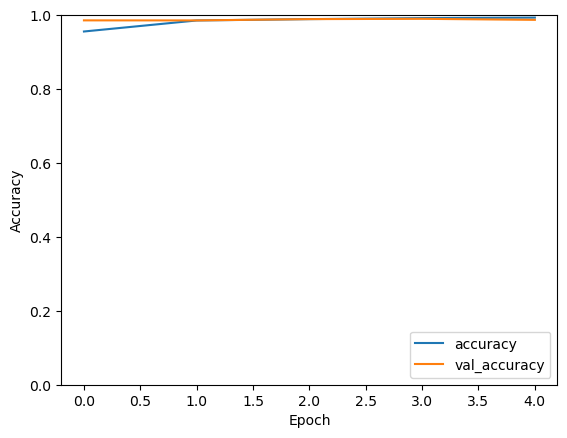

In [1]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# Load and preprocess the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

# Define the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels, epochs=5, 
                    validation_data=(test_images, test_labels))

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()


## Activation Functions in CNNs

### 1. Rectified Linear Unit (ReLU)
The standard way to model a neuron’s output \( f \) as a function of its input \( x \) is to use \( f(x) = \tanh(x) \) or \( f(x) = (1 + e^{-x})^{-1} \). However, these saturating nonlinear activation functions are much slower than the non-saturating nonlinear activation function \( f(x) = \max(0, x) \) in gradient descent algorithm. Following Nair and Hinton [106], the neurons with the nonlinearity \( f(x) = \max(0, x) \) are known as rectified linear units (ReLUs). The ReLU is one of the most notable non-saturated activation functions and is defined as:

$$
a_{i,j,k} = \max(z_{i,j,k}, 0)
$$

where \( z_{i,j,k} \) is the input of the activation function at location \((i, j)\) on the \(k\)-th channel. A potential disadvantage of the ReLU unit is that it has zero gradient whenever the unit is not active, which may cause units that are not active initially to never become active since the gradient-based optimization will not adjust their weights. Moreover, it may slow down the training process due to the constant zero gradients.

### 2. Noisy Rectified Linear Unit (NReLU) [106]

$$
a_{i,j,k} = \max(z_{i,j,k} + N(0, \sigma^2), 0)
$$

where \( N(0, \sigma^2) \) is a Gaussian noise with zero mean and variance \( \sigma^2 \). It was shown [106] that NReLUs work better than binary hidden units for recognizing objects and comparing faces, and can deal with large intensity variations much more naturally than binary units.

### 3. Leaky Rectified Linear Unit (Leaky ReLU) [102]

$$
a_{i,j,k} = \max(z_{i,j,k}, 0) + \lambda \min(z_{i,j,k}, 0)
$$

where \( \lambda \) is a predefined parameter in range (0, 1). As compared with ReLU, Leaky ReLU compresses the negative part to a small, nonzero gradient when the unit is not active.

### 4. Parametric Rectified Linear Unit (PReLU) [55]

$$
a_{i,j,k} = \max(z_{i,j,k}, 0) + \lambda \min(z_{i,j,k}, 0)
$$

### 5. Randomized Rectified Linear Unit (RReLU) [164]

$$
a_{i,j,k}^{(n)} = \max(z_{i,j,k}^{(n)}, 0) + \lambda_k^{(n)} \min(z_{i,j,k}^{(n)}, 0)
$$

where \( z_{i,j,k}^{(n)} \) denotes the input of activation function at location \((i, j)\) on the \(k\)-th channel of the \(n\)-th example, \( \lambda_k^{(n)} \) denotes its corresponding sampled parameter, and \( a_{i,j,k} \) denotes its corresponding output.

### 6. Exponential Linear Unit (ELU) [16]

$$
a_{i,j,k} = \max(z_{i,j,k}, 0) + \min(\lambda (e^{z_{i,j,k}} - 1), 0)
$$

where \( \lambda \) is a predefined parameter for controlling the value to which an ELU saturates for negative inputs.

### 7. Maxout [37]

$$
a_{i,j,k} = \max_{k \in [1, K]} z_{i,j,k}
$$

where \( z_{i,j,k} \) is the \(k\)-th channel of the feature map. Maxout enjoys all the benefits of ReLU since ReLU is actually a special case of maxout, e.g., \( \max\{w_1^T x + b_1, w_2^T x + b_2\} \), where \( w_1 \) is a zero vector and \( b_1 \) is zero. Besides, maxout is particularly well suited for training with Dropout.

### 8. Probout [141]
Probout is a probabilistic variant of maxout, and first defines a probability for each of \( k \) linear units as:

$$
\hat{p}_0 = 0.5
$$

$$
\hat{p}_i = \frac{e^{\lambda z_i}}{\sum_{j=1}^{k} e^{\lambda z_j}}
$$

The activation function is then sampled as:

$$
a_i = 
\begin{cases}
0, & \text{if } i = 0; \\
z_i, & \text{otherwise}.
\end{cases}
$$


## Commonly Used Activation Functions in CNNs

1. **Rectified Linear Unit (ReLU)**: The ReLU function is defined as:
   $$
   f(x) = \max(0, x)
   $$
   It is preferred due to its non-saturating property which speeds up the convergence of gradient descent.

2. **Noisy Rectified Linear Unit (NReLU)**: The NReLU function introduces Gaussian noise:
   $$ 
   a_{i,j,k} = \max(z_{i,j,k} + N(0, \sigma^2), 0)
   $$
   where \( N(0, \sigma^2) \) is Gaussian noise with zero mean and variance \( \sigma^2 \).

3. **Leaky Rectified Linear Unit (Leaky ReLU)**: The Leaky ReLU allows a small, non-zero gradient when the unit is not active:
   $$
   a_{i,j,k} = \max(z_{i,j,k}, 0) + \lambda \min(z_{i,j,k}, 0)
   $$
   where \( \lambda \) is a small constant.

4. **Parametric Rectified Linear Unit (PReLU)**: Similar to Leaky ReLU, but with a learnable parameter:
   $$
   a_{i,j,k} = \max(z_{i,j,k}, 0) + \alpha \min(z_{i,j,k}, 0)
   $$
   where \( \alpha \) is a learnable parameter.

5. **Randomized Rectified Linear Unit (RReLU)**: Adds a randomized parameter:
   $$
   a_{i,j,k} = \max(z_{i,j,k}, 0) + \lambda_k \min(z_{i,j,k}, 0)
   $$
   where \( \lambda_k \) is randomly sampled.

6. **Exponential Linear Unit (ELU)**: The ELU function adds an exponential component for negative inputs:
   $$
   a_{i,j,k} = \max(z_{i,j,k}, 0) + \min(\lambda (e^{z_{i,j,k}} - 1), 0)
   $$
   where \( \lambda \) controls the value to which ELU saturates for negative inputs.

7. **Maxout**: The Maxout function takes the maximum of multiple linear functions:
   $$
   a_{i,j,k} = \max_{k \in [1, K]} (z_{i,j,k})
   $$
   where \( z_{i,j,k} \) is the \( k \)-th channel of the feature map.

8. **Probout**: A probabilistic variant of Maxout:
   $$
   p_j = \frac{e^{\lambda z_j}}{\sum_{k=1}^K e^{\lambda z_k}}
   $$
   The activation function is then sampled as:
   $$
   a = \begin{cases} 
   0, & \text{if } j = 0; \\
   z_j, & \text{otherwise}.
   \end{cases}
   $$

## Loss Functions in CNNs

1. **Hinge Loss**: Used for large-margin classifiers:
   $$
   L_{\text{hinge}} = \frac{1}{N} \sum_{i=1}^N \sum_{j=1}^K \max(0, 1 - \delta(y^{(i)}, j) w^T x^{(i)})
   $$
   where \( \delta(y^{(i)}, j) = 1 \) if \( y^{(i)} = j \), and \(-1\) otherwise.

2. **Softmax Loss**: Converts logits to probabilities and computes cross-entropy:
   $$
   p_j^{(i)} = \frac{e^{z_j^{(i)}}}{\sum_{l=1}^K e^{z_l^{(i)}}}
   $$
   The softmax loss is:
   $$
   L_{\text{softmax}} = -\frac{1}{N} \sum_{i=1}^N \sum_{j=1}^K y_j^{(i)} \log(p_j^{(i)})
   $$

3. **Contrastive Loss**: Measures the similarity between pairs:
   $$
   L_{\text{contrastive}} = \frac{1}{2N} \sum_{i=1}^N \left((1 - y) d^2 + y \max(m - d, 0)^2\right)
   $$
   where \( d = \| z_1 - z_2 \|_2 \) and \( m \) is the margin.

4. **Triplet Loss**: Used to separate positive and negative pairs:
   $$
   L_{\text{triplet}} = \frac{1}{N} \sum_{i=1}^N \max(d(a,p) - d(a,n) + m, 0)
   $$
   where \( d(a,p) = \| z_a - z_p \|_2^2 \) and \( d(a,n) = \| z_a - z_n \|_2^2 \).

5. **Large-Margin Softmax Loss**: Adds an angular margin:
   $$
   p_j^{(i)} = \frac{e^{\| w_j \| \| a^{(i)} \| \psi(\theta_j)}}{\sum_{l \neq j} e^{\| w_l \| \| a^{(i)} \| \cos(\theta_l)}}
   $$
   where:
   $$
   \psi(\theta_j) = (-1)^k \cos(m\theta_j) - 2k, \quad \theta_j \in \left[\frac{k\pi}{m}, \frac{(k+1)\pi}{m}\right]
   $$

6. **Kullback–Leibler (KL) Divergence**: Measures the difference between two probability distributions:
   $$
   \text{KL}(p \| q) = \sum_{x} p(x) \log \left( \frac{p(x)}{q(x)} \right)
   $$

7. **Jensen-Shannon (JS) Divergence**: A symmetrical form of KL divergence:
   $$
   D_{\text{JS}}(p \| q) = \frac{1}{2} \left( \text{KL}\left(p \| \frac{p+q}{2}\right) + \text{KL}\left(q \| \frac{p+q}{2}\right) \right)
   $$


In [10]:
import tensorflow as tf

# Hinge loss
class HingeLoss(tf.keras.losses.Loss):
    def __init__(self, p=1):
        super(HingeLoss, self).__init__()
        self.p = p

    def call(self, y_true, y_pred):
        # Ensure y_true is of type float32
        y_true = tf.cast(y_true, dtype=tf.float32)
        delta = 1 - y_true * y_pred
        hinge_loss = tf.maximum(0.0, delta) ** self.p
        return tf.reduce_mean(hinge_loss)

# Softmax loss
class SoftmaxLoss(tf.keras.losses.Loss):
    def __init__(self):
        super(SoftmaxLoss, self).__init__()

    def call(self, y_true, y_pred):
        # Ensure y_true is of type float32 for compatibility with tf.nn.softmax_cross_entropy_with_logits
        y_true = tf.cast(y_true, dtype=tf.float32)
        softmax_loss = tf.nn.softmax_cross_entropy_with_logits(labels=y_true, logits=y_pred)
        return tf.reduce_mean(softmax_loss)

# Contrastive loss
# class ContrastiveLoss(tf.keras.losses.Loss):
#     def __init__(self, margin=1.0):
#         super(ContrastiveLoss, self).__init__()
#         self.margin = margin

#     def call(self, y_true, y_pred):
#         # Ensure y_true is of the same dtype as y_pred
#         y_true = tf.cast(y_true, dtype=y_pred.dtype)
#         d = tf.reduce_sum(tf.square(y_pred[:, 0] - y_pred[:, 1]), axis=1)
#         contrastive_loss = y_true * d + (1 - y_true) * tf.maximum(self.margin - d, 0)
#         return tf.reduce_mean(contrastive_loss)
class ContrastiveLoss(tf.keras.losses.Loss):
    def __init__(self, margin=1.0):
        super(ContrastiveLoss, self).__init__()
        self.margin = margin

    def call(self, y_true, y_pred):
        # Ensure y_true is of type float32
        y_true = tf.cast(y_true, dtype=tf.float32)
        
        # Split y_pred into two parts
        y_pred_1, y_pred_2 = tf.split(y_pred, num_or_size_splits=2, axis=1)
        
        # Compute the squared Euclidean distance
        d = tf.reduce_sum(tf.square(y_pred_1 - y_pred_2), axis=1)
        
        # Contrastive loss calculation
        contrastive_loss = y_true * d + (1 - y_true) * tf.maximum(self.margin - d, 0)
        return tf.reduce_mean(contrastive_loss)
# Triplet loss
class TripletLoss(tf.keras.losses.Loss):
    def __init__(self, margin=1.0):
        super(TripletLoss, self).__init__()
        self.margin = margin

    def call(self, y_true, y_pred):
        # y_pred should be a 3D tensor with shape [batch_size, 3, feature_dim]
        anchor, positive, negative = tf.split(y_pred, num_or_size_splits=3, axis=1)
        anchor = tf.squeeze(anchor, axis=1)
        positive = tf.squeeze(positive, axis=1)
        negative = tf.squeeze(negative, axis=1)
        pos_dist = tf.reduce_sum(tf.square(anchor - positive), axis=1)
        neg_dist = tf.reduce_sum(tf.square(anchor - negative), axis=1)
        triplet_loss = tf.maximum(pos_dist - neg_dist + self.margin, 0.0)
        return tf.reduce_mean(triplet_loss)

# Large-margin softmax loss
class LargeMarginSoftmaxLoss(tf.keras.losses.Loss):
    def __init__(self, margin=1.0):
        super(LargeMarginSoftmaxLoss, self).__init__()
        self.margin = margin

    def call(self, y_true, y_pred):
        # Apply margin to the logits
        y_true = tf.cast(y_true, dtype=tf.float32)
        cos_theta = tf.nn.softmax(y_pred, axis=-1)
        theta = tf.acos(tf.clip_by_value(cos_theta, -1.0, 1.0))
        cos_m_theta = tf.cos(theta * self.margin)
        large_margin_loss = tf.nn.softmax_cross_entropy_with_logits(labels=y_true, logits=cos_m_theta)
        return tf.reduce_mean(large_margin_loss)

# Kullback-Leibler (KL) divergence
class KLDivergence(tf.keras.losses.Loss):
    def __init__(self):
        super(KLDivergence, self).__init__()

    def call(self, y_true, y_pred):
        # Ensure y_true and y_pred are of type float32
        y_true = tf.cast(y_true, dtype=tf.float32)
        y_pred = tf.cast(y_pred, dtype=tf.float32)
        kl_divergence = tf.reduce_sum(y_true * tf.math.log(tf.maximum(y_true, 1e-10) / tf.maximum(y_pred, 1e-10)), axis=-1)
        return tf.reduce_mean(kl_divergence)

# Jensen-Shannon (JS) divergence
class JSDivergence(tf.keras.losses.Loss):
    def __init__(self):
        super(JSDivergence, self).__init__()

    def call(self, y_true, y_pred):
        # Ensure y_true and y_pred are of type float32
        y_true = tf.cast(y_true, dtype=tf.float32)
        y_pred = tf.cast(y_pred, dtype=tf.float32)
        m = 0.5 * (y_true + y_pred)
        js_divergence = 0.5 * (tf.reduce_sum(y_true * tf.math.log(tf.maximum(y_true, 1e-10) / tf.maximum(m, 1e-10)), axis=-1) +
                               tf.reduce_sum(y_pred * tf.math.log(tf.maximum(y_pred, 1e-10) / tf.maximum(m, 1e-10)), axis=-1))
        return tf.reduce_mean(js_divergence)

# Example usage
input_data = tf.random.normal([32, 10])
labels = tf.random.uniform([32, 10], maxval=2, dtype=tf.int32)

hinge_loss = HingeLoss()
softmax_loss = SoftmaxLoss()
contrastive_loss = ContrastiveLoss()
triplet_loss = TripletLoss()
large_margin_softmax_loss = LargeMarginSoftmaxLoss()
kl_divergence = KLDivergence()
js_divergence = JSDivergence()

print("Hinge Loss:", hinge_loss(labels, input_data))
print("Softmax Loss:", softmax_loss(labels, input_data))
# print("Contrastive Loss:", contrastive_loss(labels, input_data))
# print("Triplet Loss:", triplet_loss(labels, input_data))
print("Large Margin Softmax Loss:", large_margin_softmax_loss(labels, input_data))
print("KL Divergence:", kl_divergence(labels, input_data))
print("JS Divergence:", js_divergence(labels, input_data))


Hinge Loss: tf.Tensor(1.0024267, shape=(), dtype=float32)
Softmax Loss: tf.Tensor(12.892591, shape=(), dtype=float32)
Large Margin Softmax Loss: tf.Tensor(11.497324, shape=(), dtype=float32)
KL Divergence: tf.Tensor(54.65155, shape=(), dtype=float32)
JS Divergence: tf.Tensor(17.935743, shape=(), dtype=float32)


In [5]:
import tensorflow as tf

# Contrastive loss
class ContrastiveLoss(tf.keras.losses.Loss):
    def __init__(self, margin=1.0):
        super(ContrastiveLoss, self).__init__()
        self.margin = margin

    def call(self, y_true, y_pred):
        # Ensure y_true is of type float32
        y_true = tf.cast(y_true, dtype=tf.float32)
        
        # Split y_pred into two parts
        y_pred_1, y_pred_2 = tf.split(y_pred, num_or_size_splits=2, axis=1)
        
        # Compute the squared Euclidean distance
        d = tf.reduce_sum(tf.square(y_pred_1 - y_pred_2), axis=1)
        
        # Contrastive loss calculation
        contrastive_loss = y_true * d + (1 - y_true) * tf.maximum(self.margin - d, 0)
        return tf.reduce_mean(contrastive_loss)

# Example usage
input_data = tf.random.normal([32, 20])  # Adjusted to have 20 features (10+10 for pairs)
labels = tf.random.uniform([32, 1], maxval=2, dtype=tf.int32)  # Ensure labels are in shape [batch_size, 1]

contrastive_loss = ContrastiveLoss()

print("Contrastive Loss:", contrastive_loss(labels, input_data))


Contrastive Loss: tf.Tensor(10.063724, shape=(), dtype=float32)


In [9]:
import tensorflow as tf

# Triplet loss
class TripletLoss(tf.keras.losses.Loss):
    def __init__(self, margin=1.0):
        super(TripletLoss, self).__init__()
        self.margin = margin

    def call(self, y_true, y_pred):
        # Ensure y_pred has exactly 3 parts
        batch_size = tf.shape(y_pred)[0]
        feature_dim = tf.shape(y_pred)[1]
        
        if feature_dim % 3 != 0:
            raise ValueError("y_pred must have dimensions divisible by 3 to be split into anchor, positive, and negative parts.")
        
        # Split y_pred into anchor, positive, and negative
        anchor, positive, negative = tf.split(y_pred, num_or_size_splits=3, axis=1)
        
        # Compute the squared Euclidean distances
        pos_dist = tf.reduce_sum(tf.square(anchor - positive), axis=1)
        neg_dist = tf.reduce_sum(tf.square(anchor - negative), axis=1)
        
        # Compute triplet loss
        triplet_loss = tf.maximum(pos_dist - neg_dist + self.margin, 0.0)
        return tf.reduce_mean(triplet_loss)

# Example usage
# Ensure input_data has a feature dimension divisible by 3 (e.g., 3 * feature_dim)
input_data = tf.random.normal([32, 9])  # Example with feature_dim = 3
labels = tf.zeros([32, 1])  # Labels are not used in triplet loss, so just a placeholder

triplet_loss = TripletLoss()

print("Triplet Loss:", triplet_loss(labels, input_data))


Triplet Loss: tf.Tensor(2.6696954, shape=(), dtype=float32)


Combining the predictions of many different models is a very successful way to reduce test errors, but it appears to be too expensive for big neural networks. Dropout is a very efficient version of model combination through setting to zero the output of each hidden neuron with probability \( q \). Moreover, overfitting is a serious problem in deep neural networks with a large number of parameters to be learned. This overfitting can be greatly reduced by using dropout.

Dropout, introduced by Hinton et al. in 2012, is a form of regularization for fully connected neural network layers. Each element of a layer’s output is kept with probability \( p \), otherwise is randomly dropped with probability \( (1 - p) \) during training. This dropout procedure not only has good performance but also its implementation is simple.

### Dropout Procedure

The dropout procedure can be explained from two different perspectives:

- **Randomly Omitting:** Each hidden unit is randomly omitted from the network with probability \( q = 1 - p \) (say \( q = 0.5 \)). This can prevent complex co-adaptations on the training data.

- **Model Averaging:** It is computationally expensive to train all neurons or nodes in many separate layers and then to apply each of these networks to the test data in the standard way. However, dropout randomly performs model averaging with neural networks, making it possible for all of these networks to share the same weights for the hidden units that are present.

Dropout is effective for preventing the co-adaptation of feature detectors, and hence can prevent overfitting associated with their co-adaptation.

### Questions About Dropout

Dropout is an intriguing algorithm for shallow and deep learning, which seems to be more effective than fully connected neural networks, but comes with little formal understanding and raises several interesting questions:

1. What kind of model averaging is dropout implementing, exactly or in approximation, when applied to multiple layers?
2. How crucial are its parameters? For instance, is \( q = 0.5 \) necessary and what happens when other values are used? What happens when other transfer functions are used?
3. What are the effects of different values of \( q \) for different layers? What happens if dropout is applied to connections rather than units?
4. What are precisely the regularization and averaging properties of dropout?
5. What are the convergence properties of dropout?

### Dropout in Neural Networks

Consider a neural network with \( L \) hidden layers. Let \( l \in \{1, \ldots, L\} \) be the index of the \( l \)-th hidden layer of the network, and \( z^{(l)} \) denote the input vector of layer \( l \), \( y^{(l)} \) denote the output vector of layer \( l \) (where \( y^{(0)} = x \) is the input). The feedforward operation of a standard fully connected neural network can be described as:

$$
z^{(l+1)} = W^{(l)} y^{(l)} + b^{(l)}
$$

$$
y^{(l+1)} = f(z^{(l+1)})
$$

where \( W^{(l)} \) and \( b^{(l)} \) are, respectively, the weight matrix and bias vector at layer \( l \), while \( f(\cdot) \) is any elementwise activation function, such as \( f(z) = \frac{1}{1 + \exp(-z)} \) or \( f(z) = \tanh(z) \).

If dropout is applied to the outputs of a fully connected layer, then the above two equations can be rewritten as:

$$
z^{(l+1)} = M^{(l)} \odot (W^{(l)} y^{(l)} + b^{(l)})
$$

where \( M^{(l)} \) denotes the elementwise product of two matrices \( M \) and \( W \), and \( M^{(l)} \in \mathbb{R}^{d \times n} \) is a binary matrix encoding the connection information with elements \( M_{ij}^{(l)} \sim \text{Bernoulli}(p) \).

Here, Bernoulli(p) denotes a Bernoulli distribution of binary random variable \( v \):

$$
P(v = 1) = p \quad \text{and} \quad P(v = 0) = 1 - p
$$

### Dropout in CNNs

Consider a standard CNN composed of alternating convolutional and pooling layers, with fully connected layers on top. On each presentation of a training example, if layer \( l \) is followed by a pooling layer, the forward propagation without dropout can be described as:

$$
a_j^{(l+1)} = \text{pool}(a_1^{(l)}, \ldots, a_n^{(l)})
$$

where \( a_i^{(l)} \) with \( i \in R_j^{(l)} \) is pooling region \( j \) at layer \( l \) and \( a_i^{(l)} \) is the activity of each neuron within it, while \( n = |R_j| \) is the number of units in \( R_j \).

With dropout, the forward propagation of max-pooling dropout at training time becomes:

$$
\hat{a}^{(l)} = M^{(l)} \odot a^{(l)}
$$

$$
a_j^{(l+1)} = \text{pool}(\hat{a}_1^{(l)}, \ldots, \hat{a}_n^{(l)})
$$

where the activations \( \hat{a}_1, \ldots, \hat{a}_n \) in each pooling region \( j \) are reordered in nondecreasing order, i.e., \( 0 \leq \hat{a}_1^{(l)} \leq \ldots \leq \hat{a}_n^{(l)} \).

If layer \( l \) is followed by a convolutional layer, the forward propagation with dropout is formulated as:

$$
m_k^{(l)}(i) \sim \text{Bernoulli}(p)
$$

$$
\hat{a}_k^{(l)} = a_k^{(l)} \odot m_k^{(l)}
$$

$$
z_j^{(l+1)} = \sum_{k=1}^{n^{(l)}} \text{conv}(W_j^{(l+1)}, \hat{a}_k^{(l)})
$$

$$
a_j^{(l+1)} = f(z_j^{(l+1)})
$$

where \( a_k^{(l)} \) denotes the activations of feature map \( k \) (for \( k = 1, \ldots, n^{(l)} \)) at layer \( l \). The mask vector \( m_k \) consists of independent Bernoulli variables \( m_k(i) \). This mask is sampled and multiplied with activations in the \( k \)-th feature map at layer \( l \) to produce dropout-modified activations \( \hat{a}_k^{(l)} \). These modified activations are convolved with filter \( W_j^{(l+1)} \) to produce convolved features \( z_j^{(l+1)} \). The function \( f(\cdot) \) is an elementwise function applied to the convolved features to get the activations \( a_j^{(l+1)} \) of convolutional layers.



In [12]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class DropoutFullyConnectedNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, dropout_prob):
        super(DropoutFullyConnectedNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.dropout = nn.Dropout(p=dropout_prob)  # Dropout layer
        self.fc2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.dropout(x)  # Apply dropout
        x = self.fc2(x)
        return x

# Example usage
input_size = 784  # Example input size
hidden_size = 500
output_size = 10  # Example output size (e.g., number of classes)
dropout_prob = 0.5

model = DropoutFullyConnectedNN(input_size, hidden_size, output_size, dropout_prob)


In [13]:
class DropoutCNN(nn.Module):
    def __init__(self, dropout_prob):
        super(DropoutCNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=5)
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=5)
        self.dropout = nn.Dropout2d(p=dropout_prob)  # Dropout layer for 2D convolutional layers
        self.fc1 = nn.Linear(1024, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x, 2)
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, 2)
        x = self.dropout(x)  # Apply dropout
        x = x.view(-1, 1024)  # Flatten the tensor
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Example usage
dropout_prob = 0.5

model = DropoutCNN(dropout_prob)


In [14]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torchvision import datasets, transforms

# Define the Fully Connected Neural Network with Dropout
class DropoutFullyConnectedNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, dropout_prob):
        super(DropoutFullyConnectedNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.dropout = nn.Dropout(p=dropout_prob)  # Dropout layer
        self.fc2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.dropout(x)  # Apply dropout
        x = self.fc2(x)
        return x

# Define the Convolutional Neural Network with Dropout
class DropoutCNN(nn.Module):
    def __init__(self, dropout_prob):
        super(DropoutCNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=5)
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=5)
        self.dropout = nn.Dropout2d(p=dropout_prob)  # Dropout layer for 2D convolutional layers
        self.fc1 = nn.Linear(1024, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x, 2)
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, 2)
        x = self.dropout(x)  # Apply dropout
        x = x.view(-1, 1024)  # Flatten the tensor
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Training and Evaluation
def train_and_evaluate(model, train_loader, test_loader, epochs=5, lr=0.01):
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(model.parameters(), lr=lr)

    for epoch in range(epochs):
        model.train()
        running_loss = 0.0
        for images, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

        print(f'Epoch {epoch + 1}, Loss: {running_loss / len(train_loader)}')

    # Evaluate the model
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    print(f'Accuracy: {100 * correct / total}%')

# Main function to run the training and evaluation
def main():
    # Hyperparameters
    input_size = 784  # Example input size for fully connected network
    hidden_size = 500
    output_size = 10  # Number of classes
    dropout_prob = 0.5
    batch_size = 64
    epochs = 5
    learning_rate = 0.01

    # Data loading and preprocessing
    transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.5,), (0.5,))
    ])
    
    train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
    test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)
    
    train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
    test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

    # Initialize models
    fc_model = DropoutFullyConnectedNN(input_size, hidden_size, output_size, dropout_prob)
    cnn_model = DropoutCNN(dropout_prob)

    # Train and evaluate Fully Connected Network
    print("Training Fully Connected Network...")
    train_and_evaluate(fc_model, train_loader, test_loader, epochs, learning_rate)

    # Train and evaluate Convolutional Neural Network
    print("\nTraining Convolutional Neural Network...")
    train_and_evaluate(cnn_model, train_loader, test_loader, epochs, learning_rate)

if __name__ == "__main__":
    main()


ImportError: cannot import name 'PILLOW_VERSION' from 'PIL' (/home/radha/anaconda3/envs/cv37/lib/python3.7/site-packages/PIL/__init__.py)